In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
import pylab as plt

In [19]:
na = np.load("/work/uo1075/u241321/data/eemd_NAO_slp_assi_dt.npy")   # linealy detrened  

nao = na[2,:]+na[3,:]+na[4,:]

spg1 = np.load("/work/uo1075/u241321/data/EEMD_spg_density_dt.npy")   # (5,50) mode(input, c1-c4), time
spg = spg1[2,:]+spg1[3,:]+spg1[4,:]


In [20]:
# lead-lag correlation
from scipy.stats import pearsonr
import numpy as np

# lead lag pearson correlation, negative values indicate data1 leads data2, n is the lead lag step
# the time length for correlation is sample-n; for example, for 50 years sample,
# if 10 yrs leadlag is choosen, the time length is 40 yrs

def leadlagcor(data1,data2,n):
    a=-n
    b=-a
    c=b*2+1
    x=np.arange(-n,n+1,1)
    r=np.zeros((c,1))
    p=np.zeros((c,1))
    begin=x[c-1]
    end=len(data1)-x[c-1]
    
    for i in range(c):
        if i<=(b):
            r[n-i],p[n-i]=pearsonr(data1[:end], data2[i:end+i])
        else:
            r[i],p[i]=pearsonr(data1[x[i]:end+x[i]], data2[:end])
    return r,p

In [21]:
assi1 = np.load("/work/uo1075/u241321/data/eemd_t310_assi_Norwegian.npy")
assi_t = assi1[1::,:]

n=7


corr, sig=leadlagcor(nao,assi_t[1,:],n)
# corr1, sig1=leadlagcor(spg,assi_t[1,:],n)
corr2, sig2=leadlagcor(nao,spg,n)

In [6]:
# significant value for C2
significance = np.zeros((2*n+1))
yes=1
no=0

marksize3 = np.zeros((2*n+1))
s=1
l=100

for i in range(2*n+1):
        if sig[i,0] <= 0.1:
            significance[i] = yes
            marksize3[i] = l
        
        else:
            significance[i] = no
            marksize3[i] = s
            


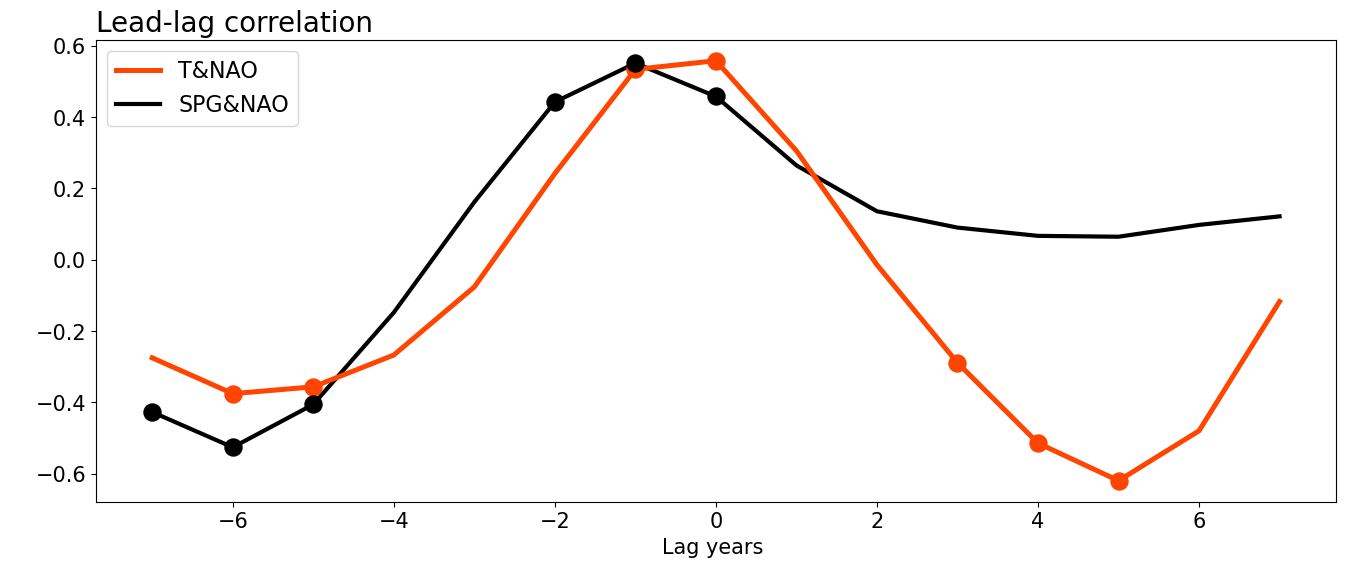

In [24]:
# 
dotsize = 150
color = 'orangered'     
x = np.arange(-n,n+1)
y1 = corr[:,0]
# y2 = corr1[:,0]
y3 = corr2[:,0]
# # y4 = corr[3,:]


fig, ax = plt.subplots(figsize = [16,6])

ax.plot(x, y1, '-', color='orangered', linewidth=3.6, markersize=10, label = 'T&NAO', zorder=10)
# ax.plot(x, y2, '-', color='orangered',linestyle='dashed',linewidth=3.6, markersize=10, label = 'T&SPG', zorder=10)
ax.plot(x, y3, '-', linewidth=3, color='black',markersize=10, label = 'SPG&NAO')

# ax.scatter(x, y1, 'o-', s=[1,2,3,2,4,3,2,2,2,1], linestyle='dashed', color='blue',label = 'raw_dtrend')
# ax.scatter(x, y1,  marksize3,color='orangered')
# ax.scatter(x, y2,  marksize1,color='green')

#NAO & T
ax.scatter(x[1], y1[1], dotsize,color=color, zorder=10)
ax.scatter(x[2], y1[2], dotsize,color=color, zorder=10)
ax.scatter(x[6], y1[6], dotsize,color=color, zorder=10)
ax.scatter(x[7], y1[7], dotsize,color=color, zorder=10)
ax.scatter(x[10], y1[10], dotsize,color=color, zorder=10)
ax.scatter(x[11], y1[11], dotsize,color=color, zorder=10)
ax.scatter(x[12], y1[12], dotsize,color=color, zorder=10)

# # SPG & T
# color = 'orangered'     
# ax.scatter(x[4], y2[4], dotsize,color=color, zorder=10)
# ax.scatter(x[12], y2[12], dotsize,color=color, zorder=10)

# NAO & SPG
color = 'black'     
ax.scatter(x[1], y3[1], dotsize,color=color, zorder=10)
ax.scatter(x[2], y3[2], dotsize,color=color, zorder=10)
ax.scatter(x[6], y3[6], dotsize,color=color, zorder=10)
ax.scatter(x[7], y3[7], dotsize,color=color, zorder=10)
ax.scatter(x[0], y3[0], dotsize,color=color, zorder=10)
ax.scatter(x[5], y3[5], dotsize,color=color, zorder=10)


ax.set_title('Lead-lag correlation ',size = '20', loc = 'left', pad = 19)

ax.set(xlabel='Lag years ', ylabel=' ',
       title='')
# ax.set_ylim(-1, 0.8)
# ax.grid()
ax.legend(loc='upper left', fontsize='16')
# ax.annotate('5%', fontsize='16',
#             xy=(80, 150), xycoords='figure points')

# plt.rcParams["font.size"] = "15"
plt.show()
fig.savefig('/work/uo1075/u241321/results/s1_lead.pdf')    